In [1]:
# Import library
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import scipy.sparse as sp
import pandas as pd
import numpy as np
import joblib
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [2]:
proportion = 2
if proportion == 1:
    test_size = 0.1
elif proportion == 2:
    test_size = 0.2
elif proportion == 3:
    test_size = 0.3
elif proportion == 4:
    test_size = 0.4

In [3]:
df_train = pd.read_csv("./data/dataset_"+str(proportion)+"/cleaned_train.csv",  sep = ',')
df_train.tail()

,text,sentiment,cleaning,casefolding,tokenizing,normalisasi,stopword,steeming,cleaned
1195,orang pas ambek demokrat tidak usah sok-sokan ...,neutral,orang pas ambek demokrat tidak usah sok sokan ...,orang pas ambek demokrat tidak usah sok sokan ...,"['orang', 'pas', 'ambek', 'demokrat', 'tidak',...","['orang', 'pas', 'ambek', 'demokrat', 'tidak',...","['orang', 'pas', 'ambek', 'demokrat', 'sok', '...","['orang', 'pas', 'ambek', 'demokrat', 'sok', '...",orang pas ambek demokrat sok sok akur kayak mu...
1196,"kampung daun memiliki suasana yang nyaman , se...",positive,kampung daun memiliki suasana yang nyaman sepe...,kampung daun memiliki suasana yang nyaman sepe...,"['kampung', 'daun', 'memiliki', 'suasana', 'ya...","['kampung', 'daun', 'memiliki', 'suasana', 'ya...","['kampung', 'daun', 'memiliki', 'suasana', 'ny...","['kampung', 'daun', 'milik', 'suasana', 'nyama...",kampung daun milik suasana nyaman gunung makan...
1197,steak yang dihidangkan dari sisi ukuran dan ke...,positive,steak yang dihidangkan dari sisi ukuran dan ke...,steak yang dihidangkan dari sisi ukuran dan ke...,"['steak', 'yang', 'dihidangkan', 'dari', 'sisi...","['steak', 'yang', 'dihidangkan', 'dari', 'sisi...","['steak', 'dihidangkan', 'sisi', 'ukuran', 'ke...","['steak', 'hidang', 'sisi', 'ukur', 'nikmat', ...",steak hidang sisi ukur nikmat asa langsung tam...
1198,"sejak awal berdiri , dapat dikatakan saya seri...",positive,sejak awal berdiri dapat dikatakan saya sering...,sejak awal berdiri dapat dikatakan saya sering...,"['sejak', 'awal', 'berdiri', 'dapat', 'dikatak...","['sejak', 'awal', 'berdiri', 'dapat', 'dikatak...","['berdiri', 'makan', 'nasi', 'goreng', 'cabang...","['diri', 'makan', 'nasi', 'goreng', 'cabang', ...",diri makan nasi goreng cabang du setiabudi bin...
1199,parkiran cukup luas dengan tambahan parkir di ...,positive,parkiran cukup luas dengan tambahan parkir di ...,parkiran cukup luas dengan tambahan parkir di ...,"['parkiran', 'cukup', 'luas', 'dengan', 'tamba...","['parkiran', 'cukup', 'luas', 'dengan', 'tamba...","['parkiran', 'luas', 'tambahan', 'parkir', 'pi...","['parkir', 'luas', 'tambah', 'parkir', 'pinggi...",parkir luas tambah parkir pinggir jalan koordi...


In [4]:
df_test = pd.read_csv("./data/dataset_"+str(proportion)+"/cleaned_test.csv",  sep = ',')
df_test.tail()

,text,sentiment,cleaning,casefolding,tokenizing,normalisasi,stopword,steeming,cleaned
295,mengapa kalian tidak pernah mempertanyakan kei...,negative,mengapa kalian tidak pernah mempertanyakan kei...,mengapa kalian tidak pernah mempertanyakan kei...,"['mengapa', 'kalian', 'tidak', 'pernah', 'memp...","['mengapa', 'kalian', 'tidak', 'pernah', 'memp...","['keislaman', 'prabowo', 'subianto', 'nya', 'b...","['islam', 'prabowo', 'subianto', 'nya', 'agama...",islam prabowo subianto nya agama kristen prote...
296,"mohon informasikan detail kronologi , pulsa aw...",neutral,mohon informasikan detail kronologi pulsa awal...,mohon informasikan detail kronologi pulsa awal...,"['mohon', 'informasikan', 'detail', 'kronologi...","['mohon', 'informasikan', 'detail', 'kronologi...","['mohon', 'informasikan', 'detail', 'kronologi...","['mohon', 'informasi', 'detail', 'kronologi', ...",mohon informasi detail kronologi pulsa mention...
297,"pantai parangtritis yogya mengecewakan , kotor...",negative,pantai parangtritis yogya mengecewakan kotor d...,pantai parangtritis yogya mengecewakan kotor d...,"['pantai', 'parangtritis', 'yogya', 'mengecewa...","['pantai', 'parangtritis', 'yogya', 'mengecewa...","['pantai', 'parangtritis', 'yogya', 'mengecewa...","['pantai', 'parangtritis', 'yogya', 'kecewa', ...",pantai parangtritis yogya kecewa kotor indah o...
298,"rasa yang ditawarkan tidak wah , tapi cocok di...",positive,rasa yang ditawarkan tidak wah tapi cocok di l...,rasa yang ditawarkan tidak wah tapi cocok di l...,"['rasa', 'yang', 'ditawarkan', 'tidak', 'wah',...","['rasa', 'yang', 'ditawarkan', 'tidak', 'wah',...","['ditawarkan', 'cocok', 'lidah', 'harga', 'ter...","['tawar', 'cocok', 'lidah', 'harga', 'jangkau'...",tawar cocok lidah harga jangkau kali makan men...
299,yang paling suka saya di sini tempura nya kak ...,positive,yang paling suka saya di sini tempura nya kak ...,yang paling suka saya di sini tempura nya kak ...,"['yang', 'paling', 'suka', 'saya', 'di', 'sini...","['yang', 'paling', 'suka', 'saya', 'di', 'sini...","['suka', 'tempura', 'nya', 'kak', 'harga', 'ny...","['suka', 'tempura', 'nya', 'kak', 'harga', 'ny...",suka tempura nya kak harga nya sahabat salah r...


In [5]:
# Split a dataset into X and y.
X_train = df_train['cleaned']
y_train = df_train['sentiment'].astype(str)
X_test = df_test['cleaned']
y_test = df_test['sentiment'].astype(str)

In [6]:
# tfidf
vectorizer = TfidfVectorizer(smooth_idf=True,norm=None,min_df=1,max_df=100)
X_train = vectorizer.fit_transform(X_train)

In [7]:
# svd
# svd = LatentDirichletAllocation(
#     n_components=1000,
#     max_iter=5,
#     learning_method="online",
#     learning_offset=50.0,
#     random_state=0,
# )

# svd = NMF(n_components=1200, init='nndsvda', random_state=0)
# X_train = svd.fit_transform(X_train)
# X_train = Normalizer(copy=False).fit_transform(X_train)
# len(X_train)

In [8]:
classifier = LogisticRegression(solver='lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression()

In [9]:
X_test = vectorizer.transform(X_test)
# X_test = svd.transform(X_test)
# y_pred = classifier.predict_proba(X_test) 
# y_pred

In [10]:
y_pred = classifier.predict(X_test) 
# y_pred

In [11]:
# classifier.classes_

              precision    recall  f1-score   support

    negative       0.78      0.61      0.68       108
     neutral       0.70      0.85      0.77        95
    positive       0.76      0.78      0.77        97

    accuracy                           0.74       300
   macro avg       0.75      0.75      0.74       300
weighted avg       0.75      0.74      0.74       300

Accuracy  0.7433333333333333
Confusion Matrix 
[[66 27 15]
 [ 5 81  9]
 [14  7 76]]
Precision  [0.77647059 0.70434783 0.76      ]
Recall  [0.61111111 0.85263158 0.78350515]
F1  [0.68393782 0.77142857 0.7715736 ]


C:\Users\anggi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


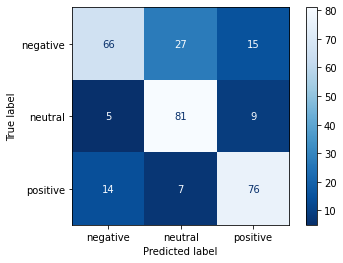

In [12]:
# Print Testing.
report = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
prec = precision_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred,average=None)
f1 = f1_score(y_test, y_pred,average=None)
print(report)
print("Accuracy ",acc)
print("Confusion Matrix ")
print(conf)
print("Precision ", prec)
print("Recall ",recall)
print("F1 ",f1)
plot_confusion_matrix(classifier,X_test,y_test,cmap="Blues_r")
print("\n")

In [13]:
# model_dump = {'vectorizer': vectorizer, 'classifier': classifier, 'accuracy_score': acc, 'confusion_matrix': conf,'precision_score':prec,'recall':recall,'f1':f1}
# joblib.dump(model_dump, open("./data/dataset_"+str(proportion)+"/sklearn.model", "wb"))